
# Method 5 : Missing value imputation using Scikit-learn for both data(Numeric and Categorical)

# Most Most Important Note:-
#Please ignore all comments in this project because I have written in my own words (or) in my own #language to better understanding about each and every commands.

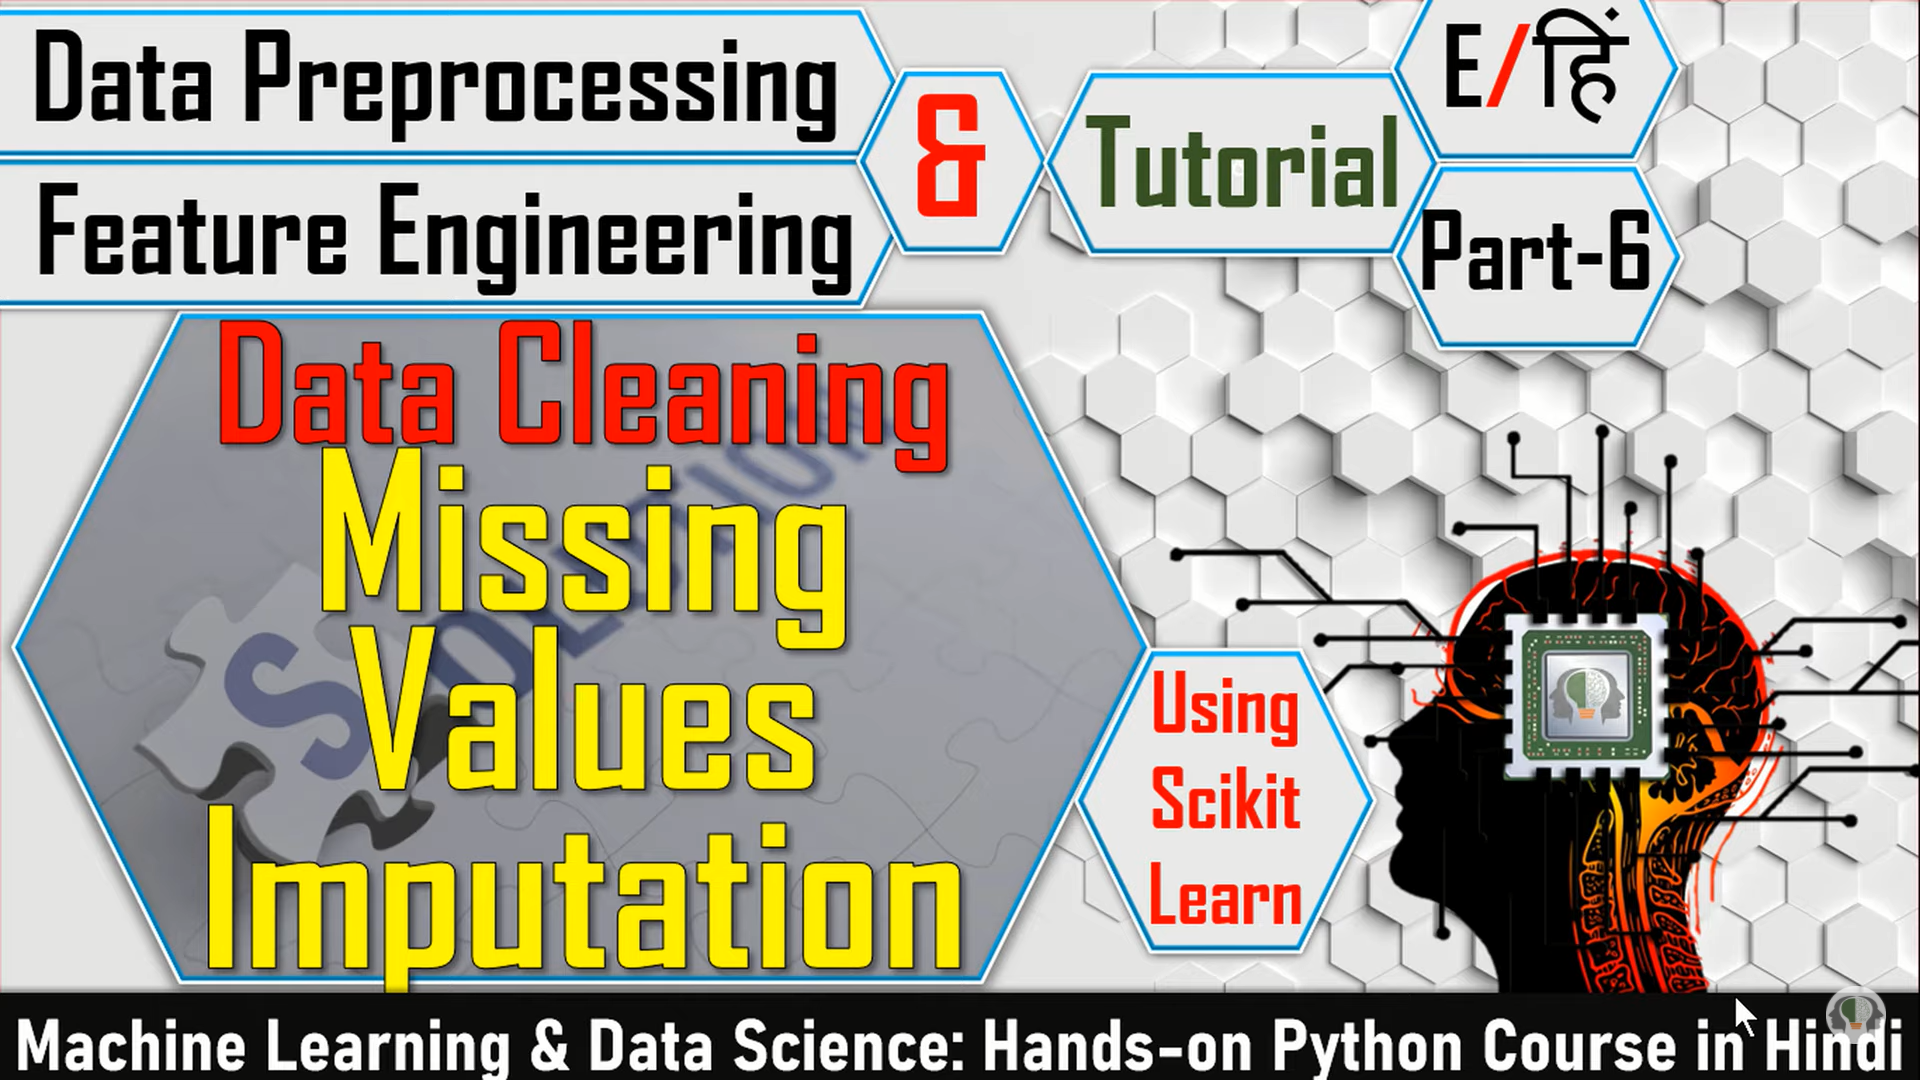

# scikit Learn (Official site)

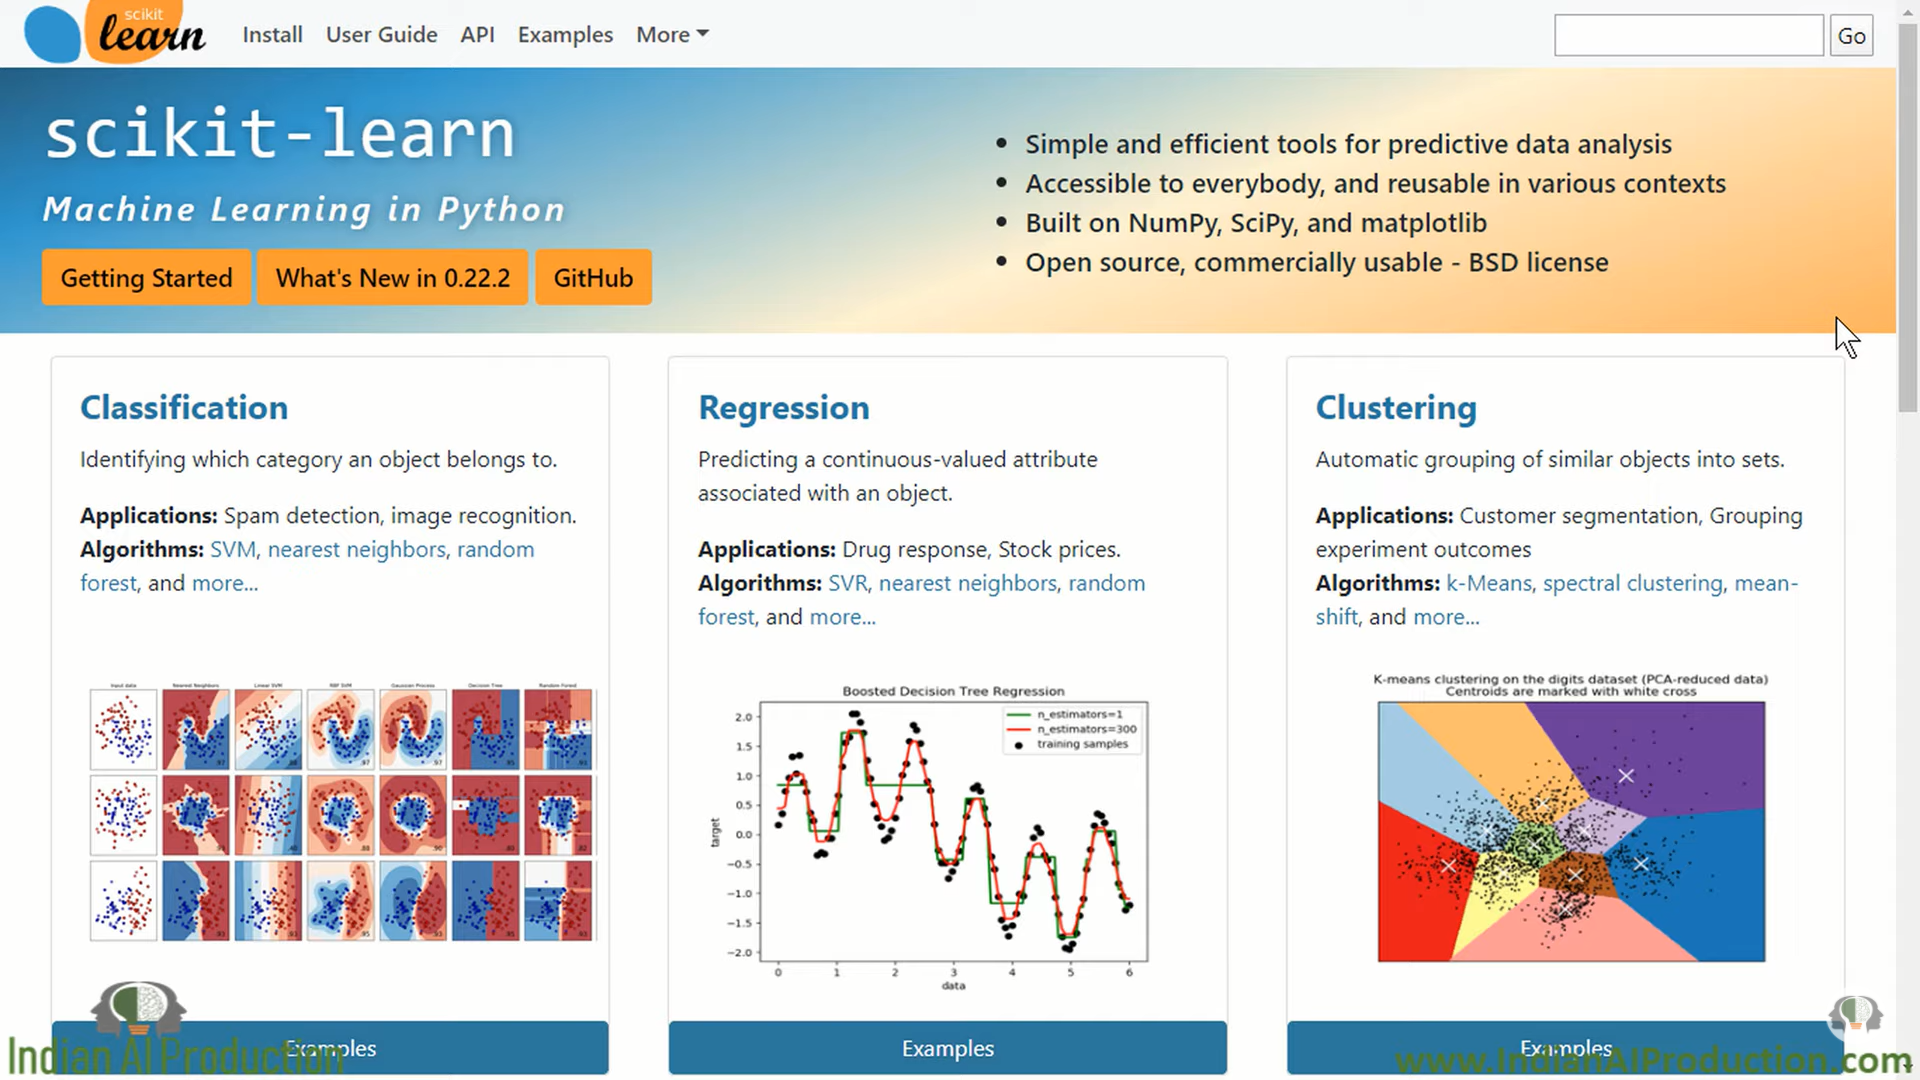

In [18]:
import numpy as np
import pandas as pd

# scikit-learn library me se "simple-impute" class ko access krna hai
from sklearn.impute import SimpleImputer 

In [19]:
train = pd.read_csv(r"/content/train.csv")

test = pd.read_csv(r"/content/test.csv")

print("shape of train df = " , train.shape)
print("shape of test df = " , test.shape)

shape of train df =  (1460, 81)
shape of test df =  (1459, 80)


In [20]:
train.head()

# "train" dataframe me ek Variable/Column jadha hai , i.e "SalePrice" or , yahi "SalePrice" 
# hamara (Target variable) 

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [21]:
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [22]:
                                        # Note:-
#           Train dataframe:-
# "train" dataframe me hmko (X_train , Y_train) krna hai kyuki jb hum "ML-Algorithm" ko train krte
# hai uss time hamare pass "Output OR Input dono alag-alag hota hai"   

#           Test dataframe:-
# "test" dataframe me hamare pass sirf-or-sirf "Input" rheta hai, "Output" nhi rhega kyuki hmko 
# "Output" ko Predict krna padhta hai

X_train = train.drop(columns = "SalePrice")  # X_train ==> X-Capital kyuki, "X_train" matrix consider krta hai
y_train = train["SalePrice"]                # y_train ==> y-small kyuki, "y_train" vector hai
print("shape of X_train = " , X_train.shape)
print("shape of y_train = " , y_train.shape)

# X_train me ab sirf 80-Variable hai kyuki hmne ab 81th Variable/Column hmne yaha "y_train" ko de 
# diya hai

shape of X_train =  (1460, 80)
shape of y_train =  (1460,)


# Numerical Missing Value Imputation

In [23]:
# take only "Numerical" Variable from "X_train" Dataset

num_vars = X_train.select_dtypes(include=["int64" , "float64"]).columns

In [24]:
num_vars

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [25]:
num_vars.shape

(37,)

In [26]:
# check missing data in these "Numerical" Columns

X_train[num_vars].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [27]:
# '''Iss part me saare-k-saare Variables ka "mean , median" lenge aur jiss Variable me 
#    Value missing hai , uss jagaha pr value ko impute krenge.

#    jb bhi "ML-Algorithm" ko train krenge, uss k baad jb hmare pass "test" dataset/dataframe ayega
#    toh ho sakta hai ki aj koi bhi ek particular "Variable" me missing_Value present nhi hai , lekin 
#    jb hamara model deploy ho jayega, fir ho sakta hai deploy hone k baad in future me uss particular
#    "Variable" me koi value naa mille mtlb saari value missing ho , iss problem ko handle krne k 
#    liye hum "train" dataset se woh value le k "test" dataset me impute krte hai
# '''

# Technique to impute Missing_Values 

In [40]:
# create object 
imputer_mean = SimpleImputer(strategy = 'mean')
imputer_mean
                
                # want to fill value "mannually"
# imputer_mean = SimpleImputer(strategy = 'constant' , fill_value=100)

SimpleImputer()

In [41]:
# object ko ye btana hai ki ye "dataset" lo aur iss dataset me jitne bhi "features/numerical_values" 
# hai , unn "features/numerical_values" ka mean Value nikalo

imputer_mean.fit(X_train[num_vars]) 

# fit() , numerical_variable ka "mean" find kr k apne pass as a "Blue-Print" rakh lega , or uss
# "Blue-Print" ko hm direct use krenge "missing_value" dataset k upper.


SimpleImputer()

In [30]:
# check all variable "mean" , by "statistics_" Attributes 

imputer_mean.statistics_

# ye method jitne bhi "Numerical" Variable hai Dataset me unn ka "mean" dena like, seen in O/P screen
# lekin ab tk "Original-Dataset" me ye value impute nhi huyi hai

array([7.30500000e+02, 5.68972603e+01, 7.00499584e+01, 1.05168281e+04,
       6.09931507e+00, 5.57534247e+00, 1.97126781e+03, 1.98486575e+03,
       1.03685262e+02, 4.43639726e+02, 4.65493151e+01, 5.67240411e+02,
       1.05742945e+03, 1.16262671e+03, 3.46992466e+02, 5.84452055e+00,
       1.51546370e+03, 4.25342466e-01, 5.75342466e-02, 1.56506849e+00,
       3.82876712e-01, 2.86643836e+00, 1.04657534e+00, 6.51780822e+00,
       6.13013699e-01, 1.97850616e+03, 1.76712329e+00, 4.72980137e+02,
       9.42445205e+01, 4.66602740e+01, 2.19541096e+01, 3.40958904e+00,
       1.50609589e+01, 2.75890411e+00, 4.34890411e+01, 6.32191781e+00,
       2.00781575e+03])

In [31]:
# Main Dataset me ye value "impute" krni hai with the help of "Transform()" 

imputer_mean.transform(X_train[num_vars])

# Disadvantages of "Scikit-learn" Libraries
# 1. when give Dataframe as input then , they give "Array" as Output 

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [33]:
# Convert this "2D numpy Array" into "dataframe"

X_train[num_vars] = imputer_mean.transform(X_train[num_vars])
test[num_vars] = imputer_mean.transform(test[num_vars])

In [34]:
# Check "train-dataframe" missing_value are present or not

X_train[num_vars].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [35]:
# Check "test-dataframe" missing_value are present or not

test[num_vars].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

# Categorical Missing Value Imputation

In [36]:
# take only "Numerical" Variable from "X_train" Dataset

cat_vars = X_train.select_dtypes(include=["O"]).columns
cat_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
cat_vars.shape

(43,)

In [38]:
X_train[cat_vars].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [39]:
# create object 
imputer_mode = SimpleImputer(strategy = 'most_frequent')   # Here , 'most_frequent' ==> "mode"
imputer_mode
                
                # want to fill value "mannually"
# imputer_mean = SimpleImputer(strategy = 'constant' , fill_value=100)

SimpleImputer(strategy='most_frequent')

In [42]:
# object ko ye btana hai ki ye "dataset" lo aur iss dataset me jitne bhi "features/Categorical_values" 
# hai , unn "features/Categorical_values" ka mean Value nikalo

imputer_mode.fit(X_train[cat_vars]) 

# fit() , numerical_variable ka "mean" find kr k apne pass as a "Blue-Print" rakh lega , or uss
# "Blue-Print" ko hm direct use krenge "missing_value" dataset k upper.


SimpleImputer(strategy='most_frequent')

In [43]:
# check all variable "mode" , by "statistics_" Attributes 

imputer_mode.statistics_

# ye method jitne bhi "Categorical" Variable hai Dataset me unn ka "mean" dena like, seen in 
# O/P screen lekin ab tk "Original-Dataset" me ye value impute nhi huyi hai

array(['RL', 'Pave', 'Grvl', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl',
       'NAmes', 'Norm', 'Norm', '1Fam', '1Story', 'Gable', 'CompShg',
       'VinylSd', 'VinylSd', 'None', 'TA', 'TA', 'PConc', 'TA', 'TA',
       'No', 'Unf', 'Unf', 'GasA', 'Ex', 'Y', 'SBrkr', 'TA', 'Typ', 'Gd',
       'Attchd', 'Unf', 'TA', 'TA', 'Y', 'Gd', 'MnPrv', 'Shed', 'WD',
       'Normal'], dtype=object)

In [44]:
# Main Dataset me ye value "impute" krni hai with the help of "Transform()" 

imputer_mode.transform(X_train[cat_vars])

# Disadvantages of "Scikit-learn" Libraries
# 1. when give Dataframe as input then , they give "Array" as Output 

array([['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal']], dtype=object)

In [45]:
# Convert this "2D numpy Array" into "dataframe"

X_train[cat_vars] = imputer_mode.transform(X_train[cat_vars])
test[cat_vars] = imputer_mode.transform(test[cat_vars])

In [46]:
# Check "train-dataframe" missing_value are present or not

X_train[cat_vars].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [47]:
# Check "test-dataframe" missing_value are present or not

test[cat_vars].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [51]:
train.isnull().sum().sum() 

6965

In [53]:
X_train.isnull().sum().sum()

0

In [ ]:
#T5- Finish Here, Missing value imputation using Scikit-learn for both data(Numeric and Categorical).